In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
dataframes = pd.read_excel('Loaded_data.xlsx', sheet_name=None)
for k, v in dataframes.items():
    display(v.head(10))

,name,place_id,restaurant_type,cuisine_type,address,county,rating,review_count,price_range,phone,website,Unnamed: 11,atmosphere,dietary_options,service_options,amenities
0,The Garden Cafe,1,Café,Irish / Café,"Assumption Rd, Blackpool, Cork, T23 FDT4, Ireland",Cork,4.7,47,€5-15,NaN,https://www.google.com/url?q=https://www.garde...,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery",Bar
1,The Oval,2,Pub,Irish,"25 S Main St, Centre, Cork, T12 Y15D, Ireland",Cork,4.7,47,€10-25,NaN,https://www.google.com/url?q=http://www.corkhe...,NaN,Casual,Non-Veg,"Takeaway, Delivery",Bar
2,Badger & Dodo Roastery Outlet,3,Café / Roastery,Coffee / Café,"11 Barrack St, Cork, T12 T8YV, Ireland",Cork,4.6,46,€5-15,NaN,https://www.google.com/url?q=https://badgerand...,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery",Bar
3,The Floury Apron,4,Café / Deli,Irish / Bakery,"3 Chapel Lane Row, Ballincollig, Cork, P31 Y32...",Cork,4.4,44,€5-15,NaN,https://www.google.com/url?q=http://www.theflo...,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery",Bar
4,Café Velo,5,Café,Irish / Café,"3 George's Quay, Ballintemple, Cork, T12 KD37,...",Cork,4.3,43,€5-15,NaN,NaN,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery",Bar
5,The Laurel Bar,6,Pub,Irish,"39 Mary St, Cork, T12 A252, Ireland",Cork,4.6,46,€10-25,NaN,NaN,NaN,Casual,Non-Veg,"Takeaway, Delivery",Bar
6,The Hyde Out,7,Pub,Irish / Cocktails,"12 Douglas St, Ballintemple, Cork, T12 EY43, I...",Cork,4.6,46,€10-25,NaN,NaN,NaN,Casual,Non-Veg,"Takeaway, Delivery",Bar
7,Tara's Tea Rooms,8,Tea Room / Café,Irish / Bakery,"45 MacCurtain Street, Centre, Cork, T23 DVY3, ...",Cork,4.7,47,€5-15,NaN,NaN,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery",Bar
8,Comix Café,9,Café / Restaurant,Polish / Irish,"Kinsale Road Commercial Centre, Unit 30, Cork,...",Cork,4.5,45,€5-15,NaN,https://www.google.com/url?q=https://comix.ie/...,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery",Bar
9,Rearden's Bar,10,Pub,Irish,"26 Washington St, Centre, Cork, T12 WNP8, Ireland",Cork,4.2,42,€10-25,NaN,https://www.google.com/url?q=http://www.rearde...,NaN,Casual,Non-Veg,"Dine-in, Takeaway, Delivery","Bar, Live music"


In [36]:
num_cols = ['rating', 'review_count']
for c in num_cols:
    if c in df_loaded.columns:
        df_loaded[c] = pd.to_numeric(df_loaded[c], errors='coerce')

if 'price_range' in df_loaded.columns:
    df_loaded['price_min'] = df_loaded['price_range'].str.extract(r'(\d+)', expand=False).astype(float)

print(df_loaded[['county','rating','review_count','price_range']].describe(include='all'))
print(df_loaded['restaurant_type'].value_counts().head(10))
print(df_loaded['cuisine_type'].value_counts().head(10))

       county      rating  review_count price_range
count     351  350.000000    351.000000         351
unique      1         NaN           NaN           3
top      Cork         NaN           NaN      €10-25
freq      351         NaN           NaN         181
mean      NaN    4.489143     44.897436         NaN
std       NaN    0.254466      2.543511         NaN
min       NaN    2.700000     27.000000         NaN
25%       NaN    4.400000     44.000000         NaN
50%       NaN    4.500000     45.000000         NaN
75%       NaN    4.600000     46.000000         NaN
max       NaN    5.000000     50.000000         NaN
restaurant_type
Pub                  73
Café                 71
Restaurant           65
Fast Casual          12
Bar                  10
Café / Restaurant    10
Bar / Restaurant      7
Restaurant / Bar      6
Café / Roastery       6
Bistro                5
Name: count, dtype: int64
cuisine_type
Irish                    73
Irish / Café             36
Coffee / Café            

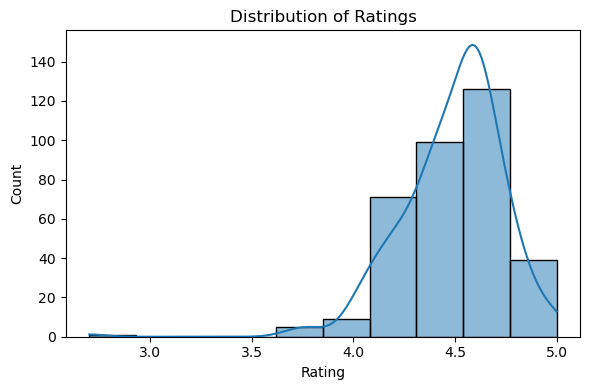

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df_loaded['rating'].dropna(), bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

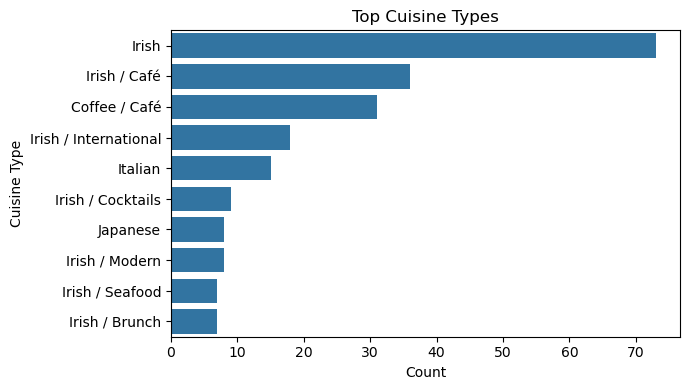

In [38]:
top_cuisines = df_loaded['cuisine_type'].value_counts().head(10)
plt.figure(figsize=(7,4))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title('Top Cuisine Types')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.tight_layout()
plt.show()

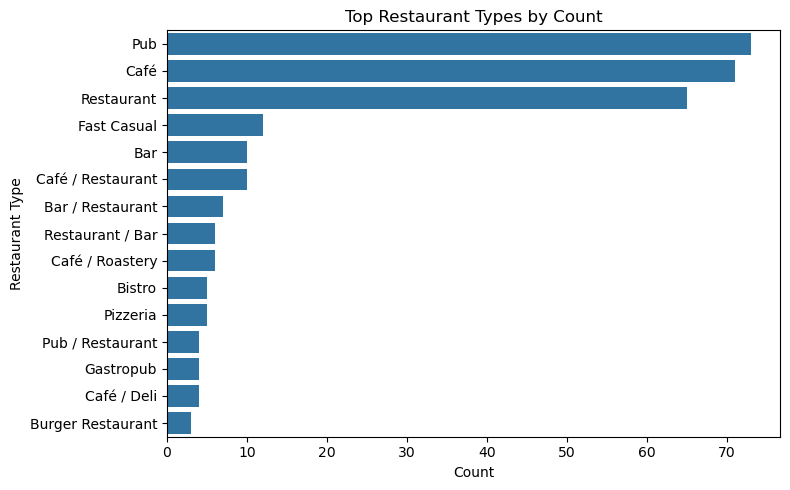

In [47]:
counts_rest_type = df_loaded['restaurant_type'].value_counts(dropna=False)
plt.figure(figsize=(8,5))
order_vals = counts_rest_type.index[:15]
sns.barplot(x=counts_rest_type.loc[order_vals].values, y=order_vals)
plt.title('Top Restaurant Types by Count')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.tight_layout()
plt.show()

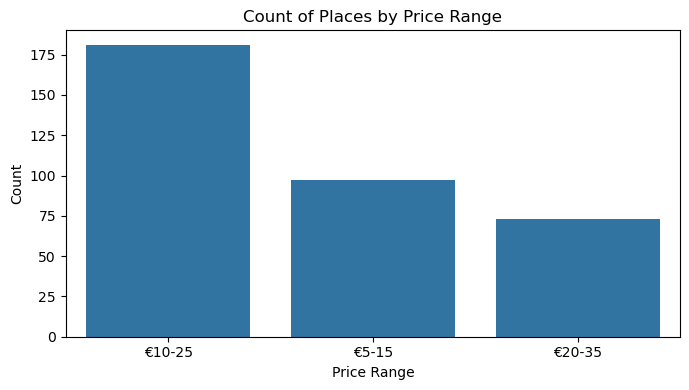

In [39]:
plt.figure(figsize=(7,4))
order_vals = df_loaded['price_range'].value_counts().index
sns.countplot(x='price_range', data=df_loaded, order=order_vals)
plt.title('Count of Places by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

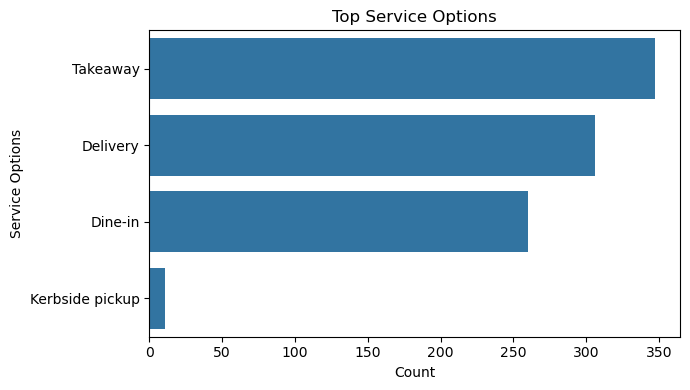

In [45]:
dt=['service_options']
for col in dt:
    if col in df_loaded.columns:
        counts = split_count(df_loaded[col])
        top_items = counts.most_common(15)
        labels = [k for k,v in top_items]
        values = [v for k,v in top_items]
        plt.figure(figsize=(7,4))
        sns.barplot(x=values, y=labels)
        plt.title('Top Service Options')
        plt.xlabel('Count')
        plt.ylabel('Service Options')
        plt.tight_layout()
        plt.show()